In [13]:
import numpy as np 
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import warnings

In [14]:
def plot_cmat(yte, ypred):
    '''Function for plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

In [15]:
# Import dataset for training using Pandas
news = pd.read_csv('scraped.csv')
text = news['text'].astype('U')
label = news['label'].astype('U')

news

,text,label
0,Scots GPs told not to meet fever patients as f...,0
1,Coronavirus : Fighting al - Shabab propaganda ...,0
2,Engineer fears China virus impact Engineer fea...,0
3,Coronavirus : South Korean PM vows swift act...,0
4,Finnair issues profit warning over Covid - 19 ...,0
...,...,...
48300,Luck? Genetics? Italian island spared from COV...,0
48301,UN says thousands of anti-Pakistan militants i...,0
48302,India’s PM to attend temple groundbreaking at ...,0
48303,Virus adds to deep despair felt by war-weary y...,0


In [16]:
# Check if there is any null values in dataset
check_nan_in_df = news.isnull()
print (check_nan_in_df)

        text  label
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
48300  False  False
48301  False  False
48302  False  False
48303  False  False
48304  False  False

[48305 rows x 2 columns]


In [17]:
# Splitting the dataset into test and train
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.25, random_state=7)

In [18]:
# Insert spliitted data into TfidfVectorizer and transform shape
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, lowercase=True)

transformed_text_train = vectorizer.fit_transform(text_train)
transformed_text_test = vectorizer.transform(text_test)
filename_vectorizer = 'TfidfVectorizer-new.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb')) # Saving model

In [19]:
# Initialize Classifier
classifier = PassiveAggressiveClassifier(max_iter=100, warm_start=True)

classifier.fit(transformed_text_train, label_train)

# Start Predict
predict = classifier.predict(transformed_text_test)

filename = 'ClassifierModel-new.sav'
pickle.dump(classifier, open(filename, 'wb')) # Saving model

Accuracy Score: 94.34%
K Fold Accuracy: 80.56%

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6247
           1       0.93      0.95      0.94      5830

    accuracy                           0.94     12077
   macro avg       0.94      0.94      0.94     12077
weighted avg       0.94      0.94      0.94     12077


Confusion Matrix


c:\Users\Rohan\anaconda3\envs\fake-news-detection\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


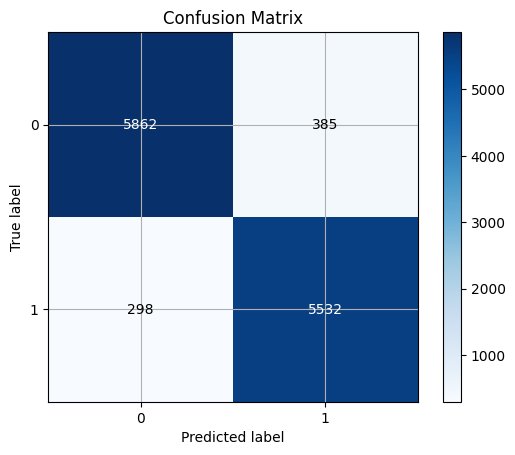

In [20]:
# Get Accuracy Score
score = accuracy_score(label_test, predict)
print("Accuracy Score: %.2f%%" % (score*100)) # Show Accuracy Score

X = vectorizer.transform(news['text'].astype('U'))
kscore = cross_val_score(classifier, X, news['label'].values, cv=5)
print(f'K Fold Accuracy: {round(kscore.mean()*100,2)}%') # Show K-Fold Accuracy Score

print("\nClassification Report")
print(classification_report(label_test, predict)) # Show Classification Report

print("\nConfusion Matrix")
plot_cmat(label_test, predict) # Show Confusion Matrix

In [21]:
## Further Validation using new dataset ##

# Read from new dataset
df_true = pd.read_csv('True.csv')
df_true['label'] = 'Real'
df_true_rep=[df_true['text'][i].replace('WASHINGTON (Reuters) - ','').replace('LONDON (Reuters) - ','').replace('(Reuters) - ','') for i in range(len(df_true['text']))]
df_true['text'] = df_true_rep
df_fake = pd.read_csv('Fake.csv')
df_fake['label'] = 'Fake'

In [22]:
# Function to find label for news in dataset
def findlabel(newtext):
    vec_newtest = vectorizer.transform([newtext])
    test_predict = classifier.predict(vec_newtest)
    return test_predict[0]

In [23]:
# Run test dataset
true_accuracy = sum([1 if findlabel((df_true['text'][i]))=='0' else 0 for i in range(len(df_true['text']))])/df_true['text'].size
fake_accuracy = sum([1 if findlabel((df_fake['text'][i]))=='1' else 0 for i in range(len(df_fake['text']))])/df_fake['text'].size

avg_accuracy = ((true_accuracy + fake_accuracy)/2)
print("{:.2%}".format(round(avg_accuracy, 2))) 

70.00%
